In [2]:
#Importare il dataset
import pandas as pd

df = pd.read_csv('../Dataset/dfFinalCompetition2025.csv')

<Figure size 1400x800 with 0 Axes>

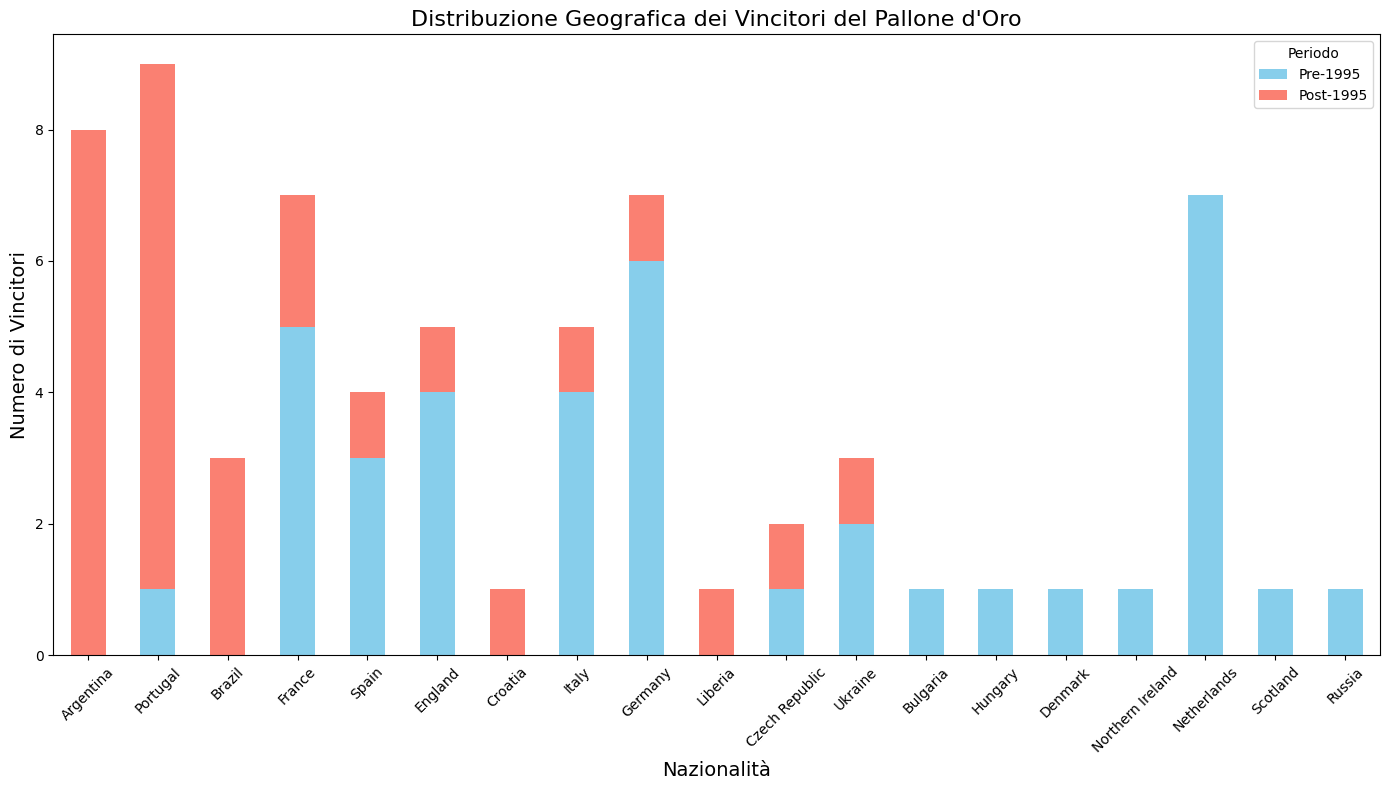

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrare i dati rilevanti: nazionalità dei vincitori in base agli anni e ai criteri di voto
pre_1995 = df[(df['year'] < 1995) & (df['rank'] == '1st')]
post_1995 = df[(df['year'] >= 1995) & (df['rank'] == '1st')]

# Calcolare il numero di vincitori per nazionalità prima e dopo il 1995
pre_1995_counts = pre_1995['nazionality'].value_counts()
post_1995_counts = post_1995['nazionality'].value_counts()

# Creare un unico dataframe per confronto
geographical_data = pd.DataFrame({
    'Pre-1995': pre_1995_counts,
    'Post-1995': post_1995_counts
}).fillna(0)

# Creazione del grafico
plt.figure(figsize=(14, 8))
geographical_data.sort_values(by='Post-1995', ascending=False).plot(
    kind='bar', stacked=True, figsize=(14, 8), color=['skyblue', 'salmon']
)
plt.title("Distribuzione Geografica dei Vincitori del Pallone d'Oro", fontsize=16)
plt.xlabel("Nazionalità", fontsize=14)
plt.ylabel("Numero di Vincitori", fontsize=14)
plt.legend(title="Periodo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


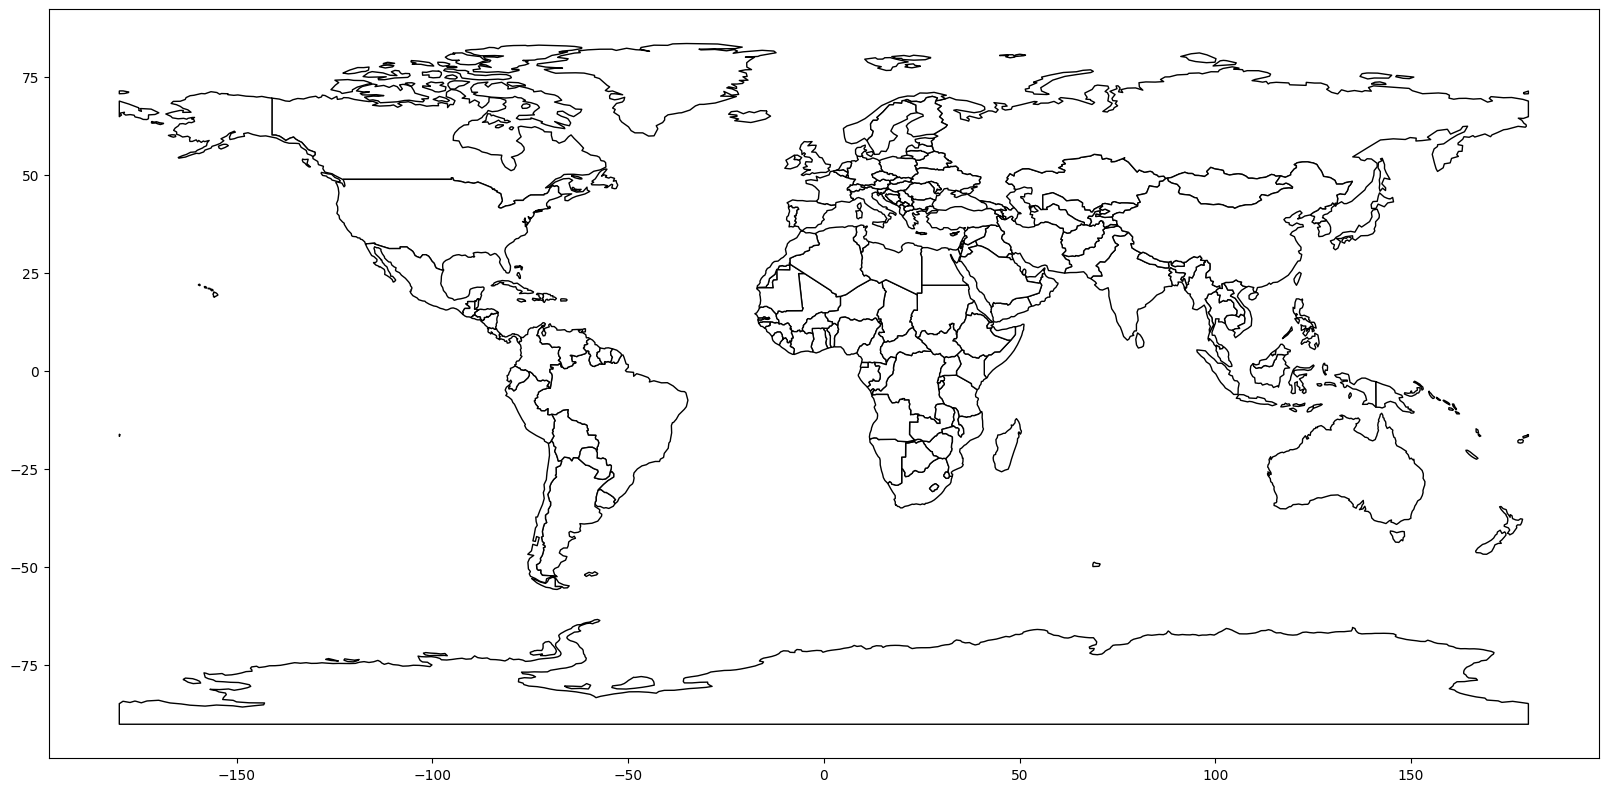

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Specifica il percorso del file .shp estratto
file_path = '../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

# Carica i dati geografici del mondo
world = gpd.read_file(file_path)
world['color'] = '#FFFFFF'

#world  = world.dropna(subset=['ADMIN'])
# Crea la mappa con dimensioni personalizzate
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
world.boundary.plot(ax=ax, linewidth=0.005, color='black')  # Linea dei bordi sottile
world.plot(ax=ax, color=world['color'], edgecolor='black')
plt.show()

In [5]:
# Sostituisci con il percorso file REGNO UNITO
uk = gpd.read_file("../gadm41_GBR_1.json/gadm41_GBR_1.json" )  
uk.loc[uk['NAME_1'] == 'NorthernIreland', 'NAME_1'] = 'Northern Ireland'
uk.loc[uk['NAME_1'] == 'NA', 'NAME_1'] = 'England'
uk = uk.drop(uk.index[-1])

In [6]:
import pandas as pd
import numpy as np

#Paesi Europei
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia",
    "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco",
    "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland",
    "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia",
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine",
    "Wales","Ireland", "Vatican City"
]


dfStati = df[['year','rank','nazionality']]
df_pre1995 =  dfStati[(dfStati['year'] < 1995) & (dfStati['rank'] == '1st')]
df_post1995 = dfStati[(dfStati['year'] >= 1995) & (dfStati['rank'] == '1st')]
#creo i df specifici
stati_unici_pre = df_pre1995['nazionality'].unique()
stati_unici_post = df_post1995 ['nazionality'].unique()
#creo le liste
list_Stati_pre = [{'ADMIN': stato, 'Numero': (df_pre1995['nazionality'] == stato).sum()} for stato in stati_unici_pre]
list_Stati_post = [{'ADMIN': stato, 'Numero': (df_post1995['nazionality'] == stato).sum()} for stato in stati_unici_post]

# Aggiungo i paesi mancanti con 0 occorrenze
for country in european_countries:
    if country not in stati_unici_pre:
        list_Stati_pre.append({'ADMIN': country, 'Numero': np.int64(0)})

print(list_Stati_pre)
print(list_Stati_post)



[{'ADMIN': 'England', 'Numero': np.int64(4)}, {'ADMIN': 'Spain', 'Numero': np.int64(3)}, {'ADMIN': 'France', 'Numero': np.int64(5)}, {'ADMIN': 'Italy', 'Numero': np.int64(4)}, {'ADMIN': 'Czech Republic', 'Numero': np.int64(1)}, {'ADMIN': 'Russia', 'Numero': np.int64(1)}, {'ADMIN': 'Scotland', 'Numero': np.int64(1)}, {'ADMIN': 'Portugal', 'Numero': np.int64(1)}, {'ADMIN': 'Hungary', 'Numero': np.int64(1)}, {'ADMIN': 'Northern Ireland', 'Numero': np.int64(1)}, {'ADMIN': 'Germany', 'Numero': np.int64(6)}, {'ADMIN': 'Netherlands', 'Numero': np.int64(7)}, {'ADMIN': 'Ukraine', 'Numero': np.int64(2)}, {'ADMIN': 'Denmark', 'Numero': np.int64(1)}, {'ADMIN': 'Bulgaria', 'Numero': np.int64(1)}, {'ADMIN': 'Albania', 'Numero': np.int64(0)}, {'ADMIN': 'Andorra', 'Numero': np.int64(0)}, {'ADMIN': 'Armenia', 'Numero': np.int64(0)}, {'ADMIN': 'Austria', 'Numero': np.int64(0)}, {'ADMIN': 'Azerbaijan', 'Numero': np.int64(0)}, {'ADMIN': 'Belarus', 'Numero': np.int64(0)}, {'ADMIN': 'Belgium', 'Numero': np.

In [7]:
#mondo POST 1995

C:\Users\matti\AppData\Local\Temp\ipykernel_21984\3321466090.py:32: UserWarning: `keep_geom_type=True` in overlay resulted in 2205 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  combined_gdf = gpd.overlay(combined_gdf, bbox, how='intersection')


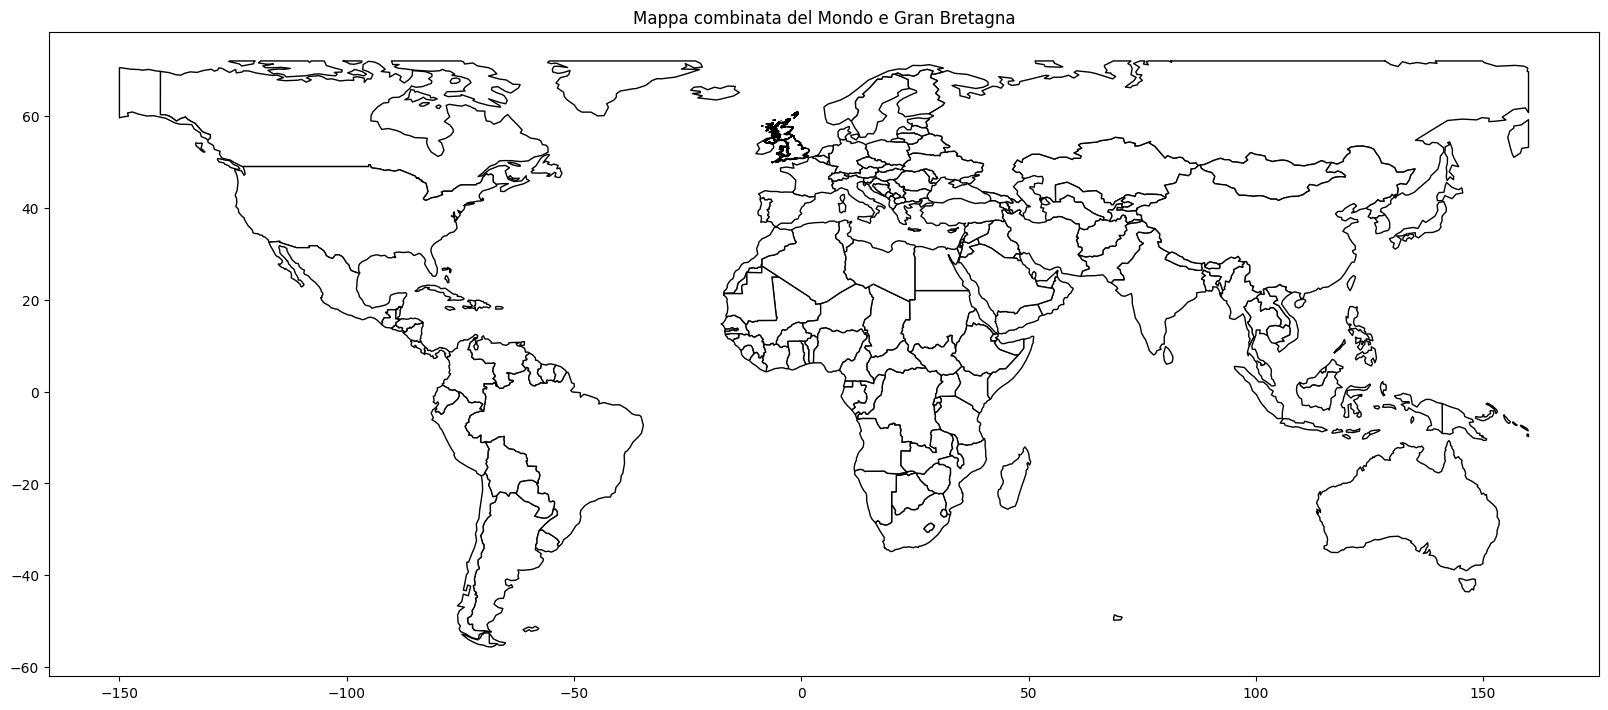

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import pandas as pd

# Carica il file del mondo (dataset incluso in GeoPandas)
world = gpd.read_file('../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Carica il file della Gran Bretagna (devi sostituire con il percorso del tuo file shapefile o GeoJSON)
# Supponiamo che tu abbia un file shapefile o GeoJSON che contiene la mappa della Gran Bretagna
uk = gpd.read_file("../gadm41_GBR_1.json/gadm41_GBR_1.json" )  # Sostituisci con il percorso del tuo file

# Verifica e allinea i CRS (Coordinate Reference System) tra la mappa del mondo e la mappa della Gran Bretagna
if world.crs != uk.crs:
    uk = uk.to_crs(world.crs)  # Allinea il CRS della Gran Bretagna a quello del mondo

# Unisci i due GeoDataFrame (mappa del mondo con la Gran Bretagna)
combined_gdf = pd.concat([world, uk], ignore_index=True)
combined_gdf['color'] = '#FFFFFF'

combined_gdf.loc[combined_gdf['NAME_1'] == 'Wales', 'ADMIN'] = combined_gdf.loc[combined_gdf['NAME_1'] == 'Wales', 'NAME_1']
combined_gdf.loc[combined_gdf['NAME_1'] == 'Scotland', 'ADMIN'] = combined_gdf.loc[combined_gdf['NAME_1'] == 'Scotland', 'NAME_1']
combined_gdf.loc[combined_gdf['NAME_1'] == 'NorthernIreland', 'ADMIN'] = combined_gdf.loc[combined_gdf['NAME_1'] == 'NorthernIreland', 'NAME_1']
combined_gdf.loc[(combined_gdf['ADMIN'].isna()) & (combined_gdf['COUNTRY'] == 'UnitedKingdom'), 'ADMIN'] = 'England'
combined_gdf['ADMIN'] = combined_gdf['ADMIN'].replace('NorthernIreland', 'Northern Ireland')

# Definiamo un bounding box approssimativo per la parte europea
minx, miny, maxx, maxy = -150.0, -60.0, 160.0, 72.0
bbox = gpd.GeoDataFrame({'geometry': [box(minx, miny, maxx, maxy)]}, crs=combined_gdf.crs)

# bounding box
combined_gdf = gpd.overlay(combined_gdf, bbox, how='intersection')

# Visualizza la mappa combinata
fig, ax = plt.subplots(figsize=(20, 10))  # Imposta la dimensione della mappa
combined_gdf.boundary.plot(ax=ax, linewidth=0.005, color='black')  # Linea dei bordi sottile
combined_gdf.plot(ax=ax, color=combined_gdf['color'], edgecolor='black')
plt.title("Mappa combinata del Mondo e Gran Bretagna")
plt.show()

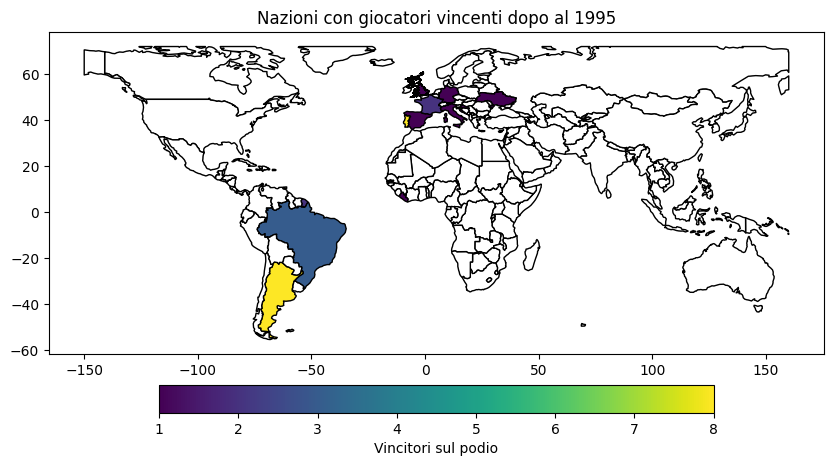

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

occurrences_df = pd.DataFrame(list_Stati_post)

# Unire i dati delle occorrenze con il DataFrame geografico
combined_gdf = combined_gdf.merge(occurrences_df, how='left', on='ADMIN')

# Definire una mappa di colori graduale
cmap = plt.cm.viridis

# Normalizzare i valori delle occorrenze per la mappa di colori
norm = mcolors.Normalize(vmin=combined_gdf['Numero'].min(), vmax=combined_gdf['Numero'].max())

# Applicare la mappa di colori ai valori delle occorrenze e impostare gli stati senza occorrenze a bianco
combined_gdf['color'] = combined_gdf['Numero'].apply(lambda x: mcolors.to_hex(cmap(norm(x))) if x > 0 else '#FFFFFF')

# Crea la mappa con i colori specificati e bordi neri con una linea sottile
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
combined_gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')  # Linea dei bordi sottile
combined_gdf.plot(ax=ax, color=combined_gdf['color'], edgecolor='black')

# Aggiungere la legenda manualmente
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Vincitori sul podio')
ax.set_title('Nazioni con giocatori vincenti dopo al 1995')

#Salva Immagine grafico
fig.savefig("../Grafici/immagini/mappaMondiale.pdf", dpi=600)
# Mostra la mappa
plt.show()
plt.close()

# Salva il GeoDataFrame modificato in un nuovo file GeoJSON
output_file_path = 'world_post1995.geojson'
combined_gdf.to_file(output_file_path, driver='GeoJSON')

In [10]:
#EUROPA 1995

C:\Users\matti\AppData\Local\Temp\ipykernel_21984\1151119465.py:27: UserWarning: `keep_geom_type=True` in overlay resulted in 2205 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  europa_github = gpd.overlay(europa_github, bbox, how='intersection')


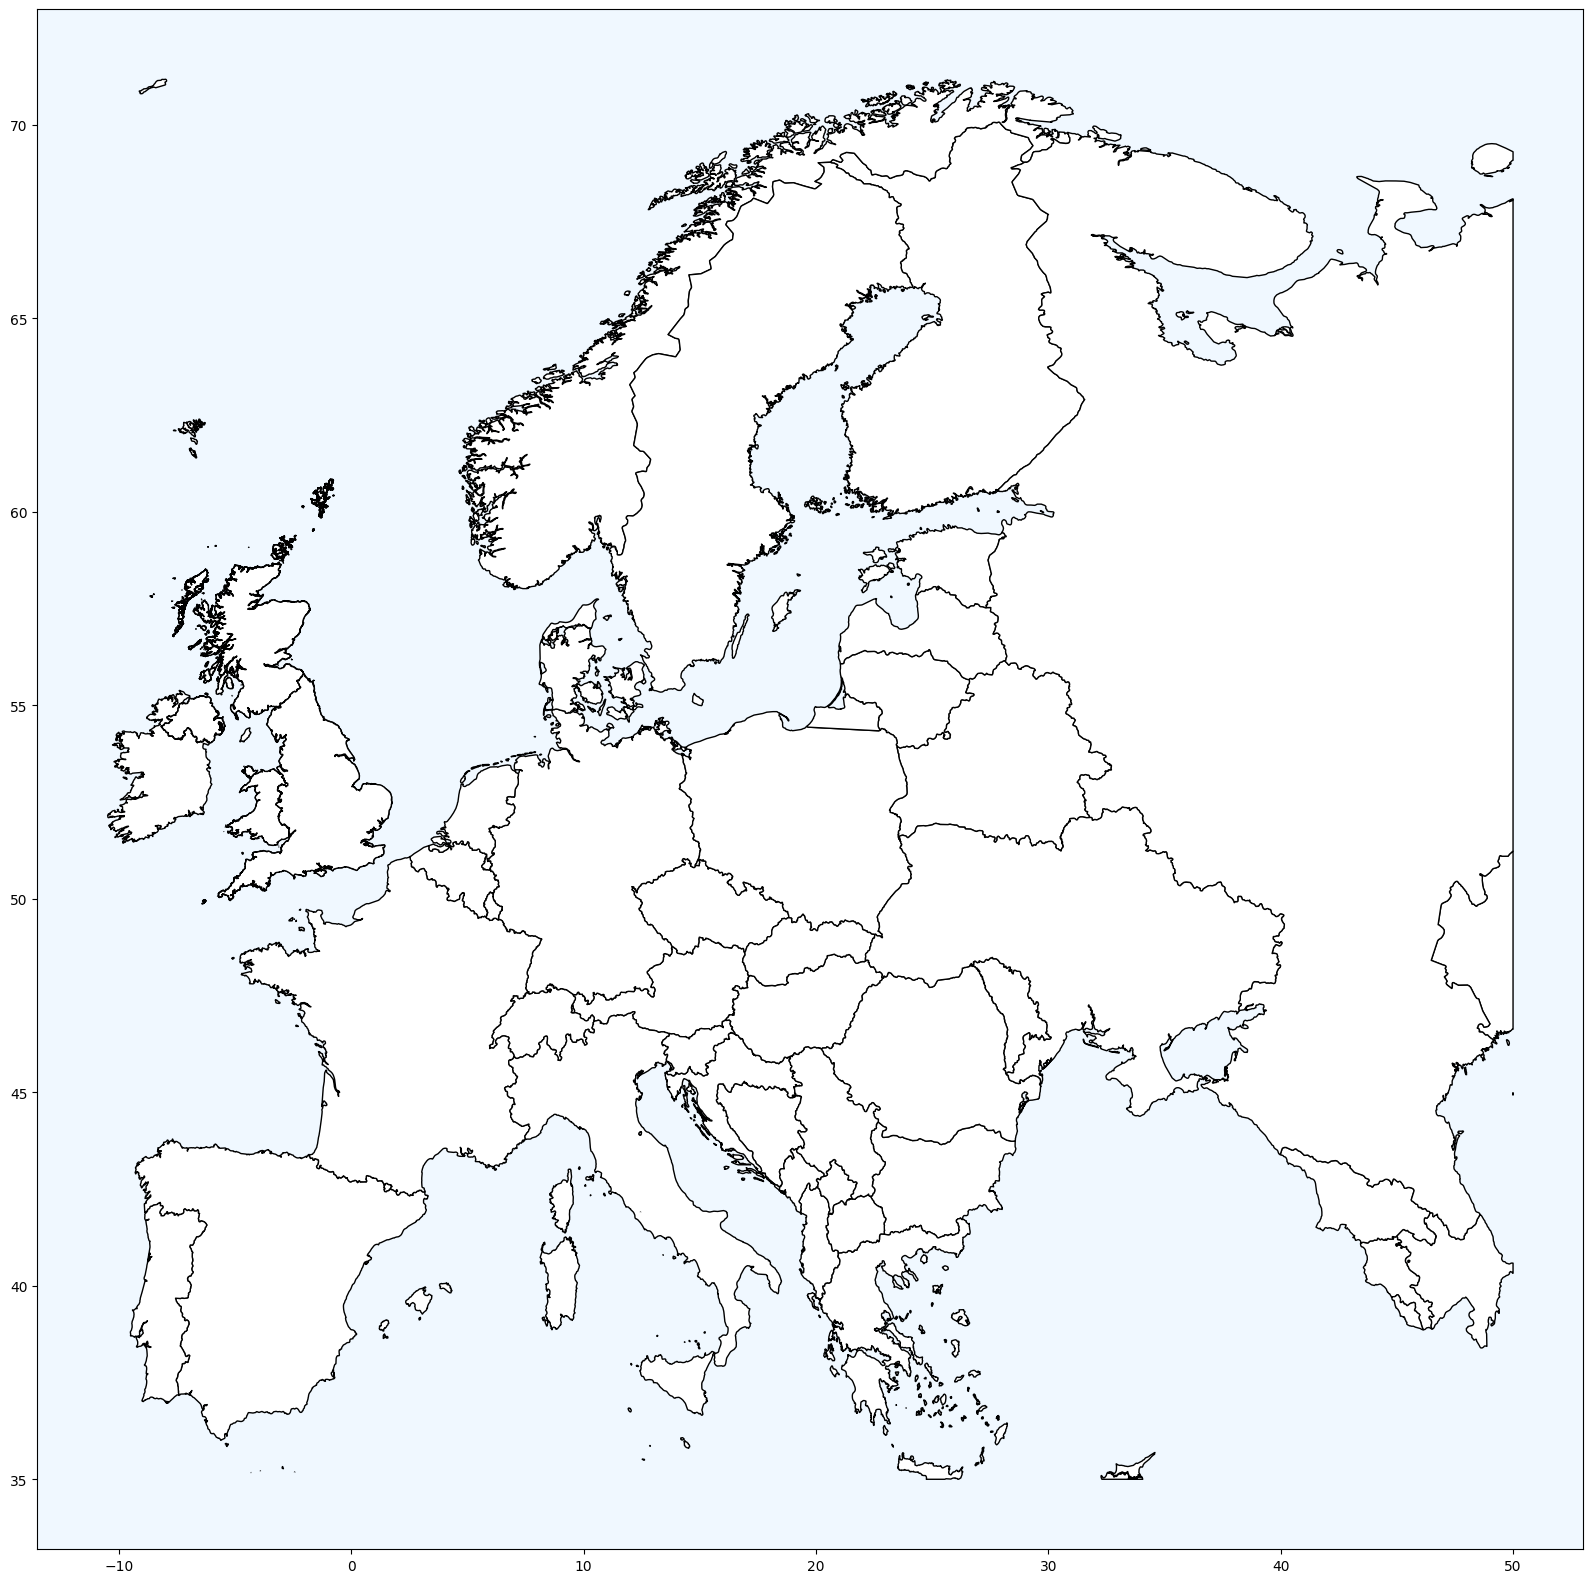

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# Specifica il percorso del file .shp estratto
file_path_github = '../countries.geojson'

# Carica i dati geografici del mondo
europa_github = gpd.read_file(file_path_github)

europa_github = pd.concat([europa_github, uk], ignore_index=True)
# Unisci i due GeoDataFrame (mappa del mondo con la Gran Bretagna)
europa_github.loc[europa_github['NAME_1'] == 'Wales', 'ADMIN'] = europa_github.loc[europa_github['NAME_1'] == 'Wales', 'NAME_1']
europa_github.loc[europa_github['NAME_1'] == 'Scotland', 'ADMIN'] = europa_github.loc[europa_github['NAME_1'] == 'Scotland', 'NAME_1']
europa_github.loc[europa_github['NAME_1'] == 'NorthernIreland', 'ADMIN'] = europa_github.loc[europa_github['NAME_1'] == 'NorthernIreland', 'NAME_1']
europa_github.loc[(europa_github['ADMIN'].isna()) & (europa_github['COUNTRY'] == 'UnitedKingdom'), 'ADMIN'] = 'England'
europa_github['ADMIN'] = europa_github['ADMIN'].replace('NorthernIreland', 'Northern Ireland')

europa_github['color'] = '#FFFFFF'


# Definiamo un bounding box approssimativo per la parte europea
minx, miny, maxx, maxy = -12.0, 35.0, 50.0, 72.0
bbox = gpd.GeoDataFrame({'geometry': [box(minx, miny, maxx, maxy)]}, crs=europa_github.crs)

# bounding box
europa_github = gpd.overlay(europa_github, bbox, how='intersection')

# Stati da eliminare
states_to_remove = ['Morocco', 'Algeria', 'Tunisia', 'Turkey', 'Syria', 'Iraq', 'Iran']
europa_github = europa_github.drop(europa_github[europa_github['ADMIN'].isin(states_to_remove)].index)

# Imposta il colore grigio chiaro per gli stati specificati
#states_to_color = ['Morocco', 'Algeria', 'Tunisia', 'Turkey', 'Syria', 'Iraq', 'Iran']
#europa_github.loc[europa_github['ADMIN'].isin(states_to_color), 'color'] = '#D3D3D3'

# Crea la mappa con dimensioni personalizzate
fig, ax = plt.subplots(1, 1, figsize=(30, 20))
europa_github.boundary.plot(ax=ax, linewidth=0.005, color='black')  # Linea dei bordi sottile
europa_github.plot(ax=ax, color=europa_github['color'], edgecolor='black')

ax.set_facecolor('#f0f8ff')  # Imposta il colore di sfondo a azzurrino chiaro
plt.show()

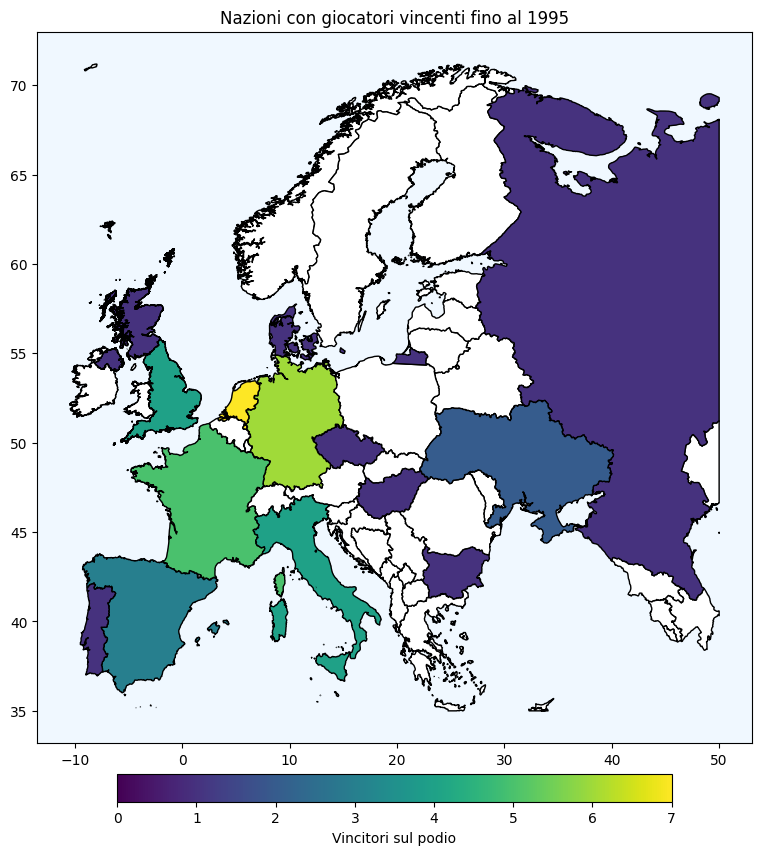

In [12]:
import pandas as pd
import matplotlib.colors as mcolors

occurrences_df = pd.DataFrame(list_Stati_pre)

# Unire i dati delle occorrenze con il DataFrame geografico
europa_github = europa_github.merge(occurrences_df, how='left', on='ADMIN')

# Riempire i valori NaN con 0 (nessuna occorrenza)
europa_github['Numero'] = europa_github['Numero'].fillna(0)

# Definire una mappa di colori graduale
cmap = plt.cm.viridis

# Normalizzare i valori delle occorrenze per la mappa di colori
norm = mcolors.Normalize(vmin=europa_github['Numero'].min(), vmax=europa_github['Numero'].max())

# Applicare la mappa di colori ai valori delle occorrenze e impostare gli stati senza occorrenze a bianco
europa_github['color'] = europa_github['Numero'].apply(lambda x: mcolors.to_hex(cmap(norm(x))) if x > 0 else '#FFFFFF')

# Imposta il colore grigio chiaro per gli stati specificati
states_to_color = ['Morocco', 'Algeria', 'Tunisia', 'Turkey', 'Syria', 'Iraq', 'Iran']
europa_github.loc[europa_github['ADMIN'].isin(states_to_color), 'color'] = '#D3D3D3'


# Crea la mappa con i colori specificati e bordi neri con una linea sottile
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
europa_github.boundary.plot(ax=ax, linewidth=0.1, color='black')  # Linea dei bordi sottile
europa_github.plot(ax=ax, color=europa_github['color'], edgecolor='black')

# Aggiungere la legenda manualmente
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Vincitori sul podio')
ax.set_title('Nazioni con giocatori vincenti fino al 1995')
ax.set_facecolor('#f0f8ff')  # Imposta il colore di sfondo a azzurrino chiaro


#Salva immagine grafico, salvo prima perche .show() svuota la figura dopo la visualizzazione.
plt.savefig("../Grafici/immagini/mappaEuropa1995.pdf", dpi=600)
# Mostra la mappa
plt.show()

# Salva il GeoDataFrame modificato in un nuovo file GeoJSON
output_file_path = 'world_pre1995.geojson'
europa_github.to_file(output_file_path, driver='GeoJSON')